In [1]:
import sys
sys.path.append('../')
from kmodule.keystroke_module import *
import numpy as np

In [ ]:
# TO DO: kontrola bledow np. w konstruktorze klasy -?
# zalozenie minimalnej dlugosci: 100 czy 150? (bo wynika ze w ciagu 6min z 1.datasetu najmniej to 107 i 117 po filtracji, reszta co najmniej 150 kikniec, srednio na osobe wychodzi 600)

## Read data - 1. dataset

Patients with PD:  60
Patients without PD:  56


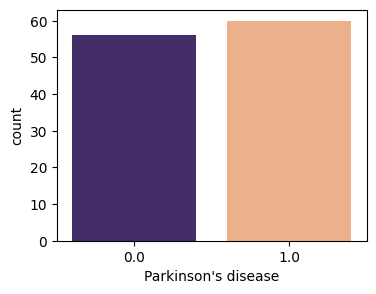

In [2]:
filename1 = 'D:/studia_mgrEIM/master_diploma/data/neuroqwerty/MIT-CS1PD/GT_DataPD_MIT-CS1PD.csv'
filename2 = 'D:/studia_mgrEIM/master_diploma/data/neuroqwerty/MIT-CS2PD/GT_DataPD_MIT-CS2PD.csv'
path = 'D:/studia_mgrEIM/master_diploma/data/neuroqwerty/all/'

data1 = nqDataset(filename1, filename2)
data1.show_stats()

In [3]:
data1.prepare_dataset(path, feature_extract=2)
print(data1.features.shape)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
(116, 22)


In [4]:
# np.save('nq_ex2_features.npy', data1.features)
# np.save('nq_ex2_gt.npy', data1.user_info['Parkinsons'].to_numpy())

# np.save('nq_ex1_features_asym.npy', data1.features)
# np.save('nq_ex1_gt_asym.npy', data1.user_info['Parkinsons'].to_numpy())

In [2]:
sX = np.load('nq_ex1_features.npy')
sY = np.load('nq_ex1_gt.npy')

## Read data - 2. dataset (TAPPY)

In [ ]:
# TO DO: sztuczne powiększenie zbioru grupy kontrolnej w Tappy ?
# how many files? - this number of records

Patients with PD:  108
Patients without PD:  41


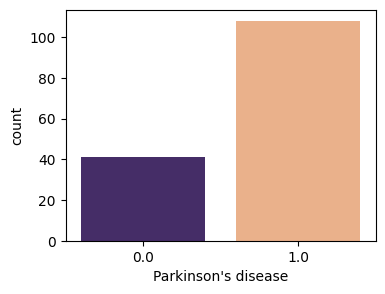

In [2]:
directory_path1 = 'D:/studia_mgrEIM/master_diploma/data/tappy-keystroke-data-1.0.0/Archived_users/'
directory_path2 = 'D:/studia_mgrEIM/master_diploma/data/tappy-keystroke-data-1.0.0/Tappy_Data/'

data2 = tappyDataset(directory_path1, directory_path2, opt=1)
data2.show_stats()

In [3]:
data2.user_info.tail()

,pID,files,Parkinsons
222,ZT9ASWFCFS,[ZT9ASWFCFS_1606.txt],1.0
223,ZWBPPNQCUX,"[ZWBPPNQCUX_1608.txt, ZWBPPNQCUX_1612.txt]",1.0
224,ZWHGXDUDLG,[ZWHGXDUDLG_1703.txt],1.0
225,ZY9CCHSPF2,"[ZY9CCHSPF2_1607.txt, ZY9CCHSPF2_1608.txt, ZY9...",1.0
226,ZYWLN4JVLA,[ZYWLN4JVLA_1701.txt],1.0


In [3]:
data2.prepare_dataset(directory_path2, feature_extract=2)
# print(data2.trainset.shape)


Index:  0
L:  2
used

Index:  1
L:  2
used

Index:  2
L:  2
used

Index:  3
L:  2
used

Index:  4
L:  2
used

Index:  5
L:  6
used

Index:  6
L:  2
used

Index:  7
L:  1
used

Index:  8
L:  4
used

Index:  9
L:  2
used

Index:  10
L:  1
used

Index:  11
L:  2
used

Index:  12
L:  2
used

Index:  13
L:  1
used

Index:  14
L:  8
used

Index:  15
L:  7
used

Index:  16
L:  8
used

Index:  17
L:  2
used

Index:  18
L:  1
used

Index:  19
L:  8
used

Index:  20
L:  3
used

Index:  21
L:  3
used

Index:  22
L:  2
used

Index:  23
L:  2
used

Index:  24
L:  3
used

Index:  25
L:  8
used

Index:  26
L:  1
used

Index:  27
L:  1
used

Index:  28
L:  2
used

Index:  29
L:  2
used

Index:  30
L:  3
used

Index:  31
L:  1
used

Index:  32
L:  3
used

Index:  33
L:  8
used

Index:  34
L:  1
used

Index:  35
L:  7
used

Index:  36
L:  2
used

Index:  37
L:  3
used

Index:  38
L:  1
used

Index:  39
L:  7
used

Index:  40
L:  1
used

Index:  41
L:  2
used

Index:  42
L:  3
used

Index:  43
L:  3
use

In [6]:
# print(data2.features.shape)
X, Y = sampling_imbalanced_data(
    data2.features, data2.user_info['Parkinsons'].to_numpy(), opt='over')
np.save('tappy_ex2_features_over.npy', X)
np.save('tappy_ex2_gt_over.npy', Y)

In [4]:
np.save('tappy_ex2_features.npy', data2.features)
np.save('tappy_ex2_gt.npy', data2.user_info['Parkinsons'].to_numpy())

# np.save('tappy_ex2_features_asym.npy', data2.features)
# np.save('tappy_ex2_gt_asym.npy', data2.user_info['Parkinsons'].to_numpy())

In [2]:
signiX = np.load('data_features.npy')
signiY = np.load('data_gt.npy')

In [36]:
def sampling_imbalanced_data_tmp(X, y, opt='under'):
    if str(opt) == 'under':
        rus = RandomUnderSampler(random_state=None)
        X_resampl, y_resampl = rus.fit_resample(X, y)
    else:
        ros = RandomOverSampler(random_state=None)
        X_resampl, y_resampl = ros.fit_resample(X, y)
    return X_resampl, y_resampl
    

X_resampl, y_resampl = sampling_imbalanced_data_tmp(signiX, signiY, opt='under')
trainset, testset, train_ground_truth, test_ground_truth = train_test_split(
    X_resampl, y_resampl, test_size=0.3, shuffle=True, random_state=42)
    # signiX, signiY, test_size=0.3, shuffle=True, random_state=42)

('  KNN')
model = train_kNN_model(trainset, train_ground_truth)
predictions, acc_val, rep = test_selected_model(testset, test_ground_truth, model)

('  SVM')
model = train_SVM_model(trainset, train_ground_truth)
predictions, acc_val, rep = test_selected_model(testset, test_ground_truth, model)

0.3076923076923077
              precision    recall  f1-score   support

         0.0       0.29      0.33      0.31        12
         1.0       0.33      0.29      0.31        14

    accuracy                           0.31        26
   macro avg       0.31      0.31      0.31        26
weighted avg       0.31      0.31      0.31        26

0.4230769230769231
              precision    recall  f1-score   support

         0.0       0.42      0.67      0.52        12
         1.0       0.43      0.21      0.29        14

    accuracy                           0.42        26
   macro avg       0.42      0.44      0.40        26
weighted avg       0.43      0.42      0.39        26

